In [1]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
print(sys.path)
from ooipy.request import hydrophone

#sys.path.append('../')

#sys.path.insert(1, '/request/hydrophone/')
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime



# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

['C:\\Users\\fschwock\\Documents\\Research\\Studium_Master\\Research\\programming\\ooi_lib\\ooipy\\ooipy\\tests', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy\\python37.zip', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy\\DLLs', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy\\lib', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy', '', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy\\lib\\site-packages', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy\\lib\\site-packages\\win32', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy\\lib\\site-packages\\win32\\lib', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy\\lib\\site-packages\\Pythonwin', 'C:\\Users\\fschwock\\AppData\\Local\\Continuum\\anaconda3\\envs\\obspy\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\fschwock\\.ipython', 'C:\\Us

In [2]:
start_time = datetime.datetime(2017,3,10,0,0,0)
end_time = datetime.datetime(2017,3,10,0,5,0)
node = '/PC01A'

#print('single thread function: \n')
#data1 = hydrophone.get_acoustic_data(start_time, end_time, node)
#print(data1.stats)

#print('----------------------------------------------------------------- \n')

print('multi thread function: \n')
data1 = hydrophone.get_acoustic_data_conc(start_time, end_time, node)
print(data1.stats)

multi thread function: 

         network: OO
         station: HYVM2
        location: /PC01A
         channel: YDH
       starttime: 2017-03-09T23:59:59.999999Z
         endtime: 2017-03-10T00:04:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9217, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 37752832})
      processing: ['ObsPy 1.2.1: trim(endtime=UTCDateTime(2017, 3, 10, 0, 5)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 3, 10, 0, 0))']


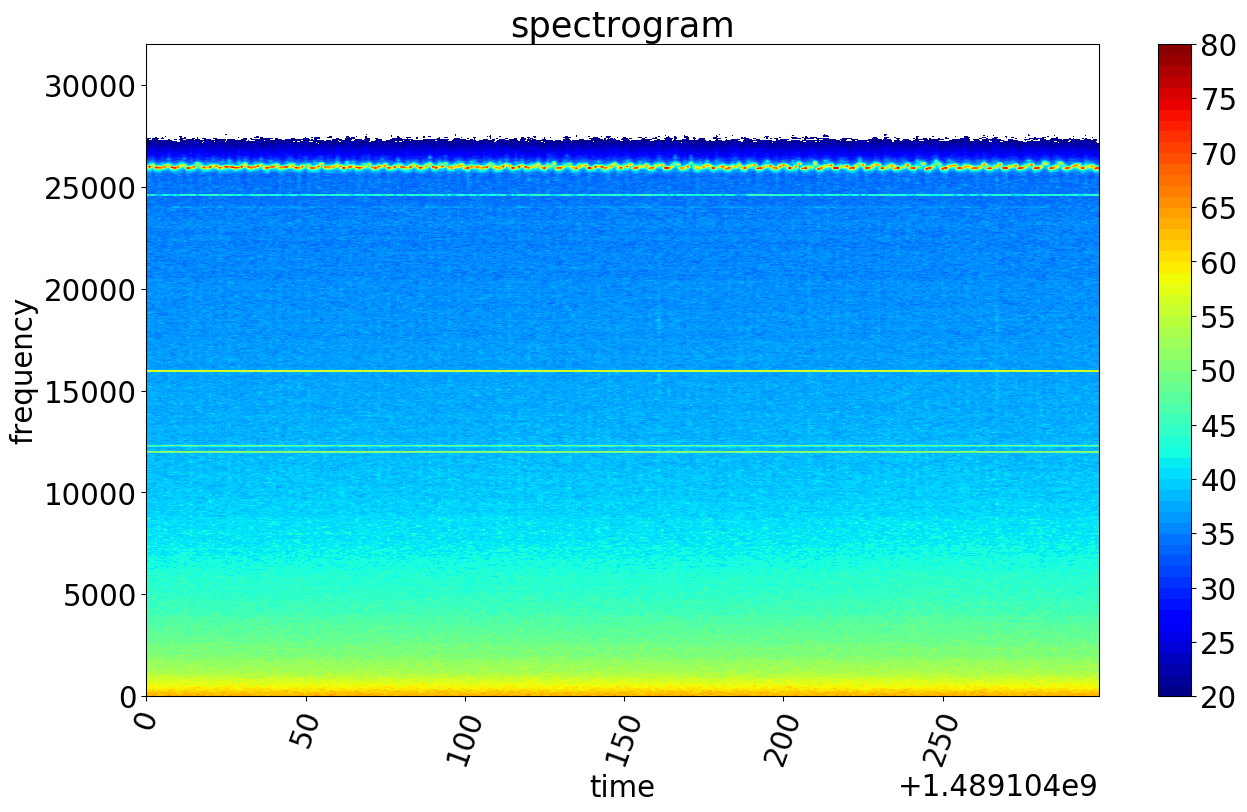

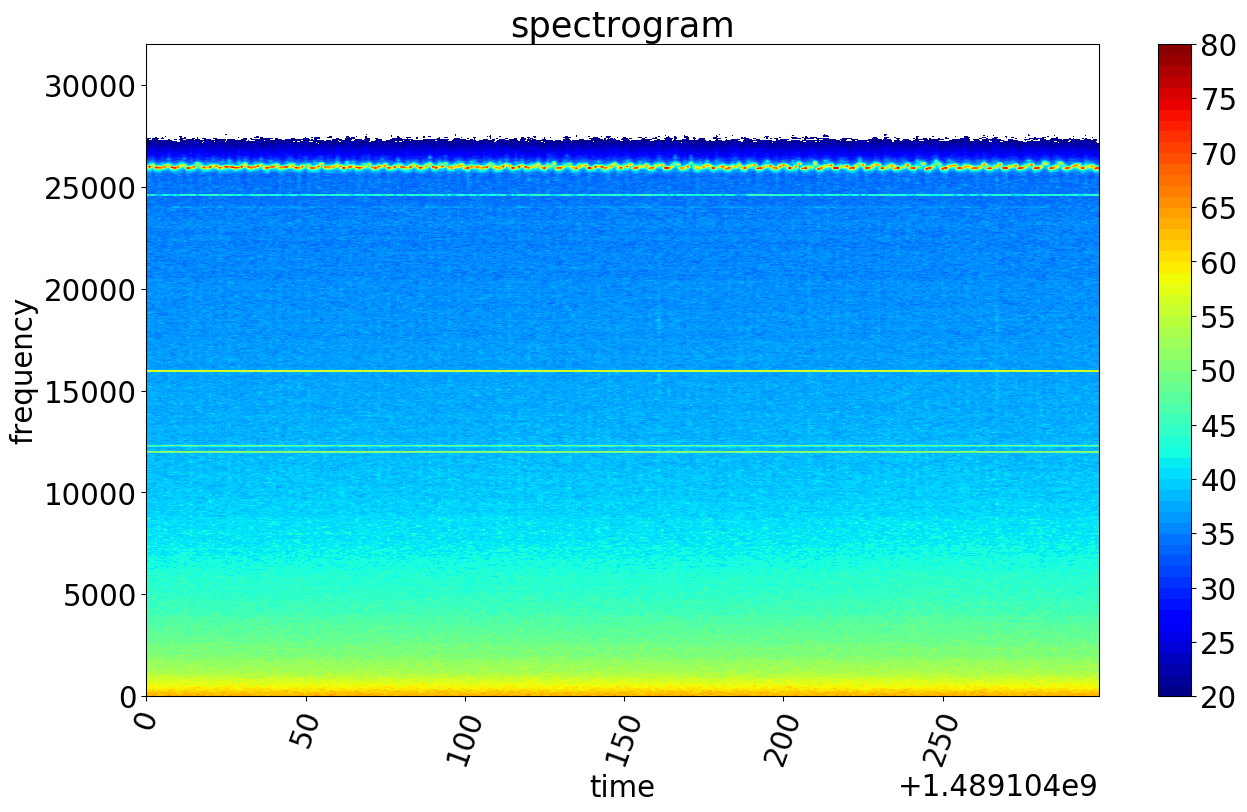

C:\Users\fschwock\Documents\Research\Studium_Master\Research\programming\ooi_lib\ooipy\ooipy\hydrophone\basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


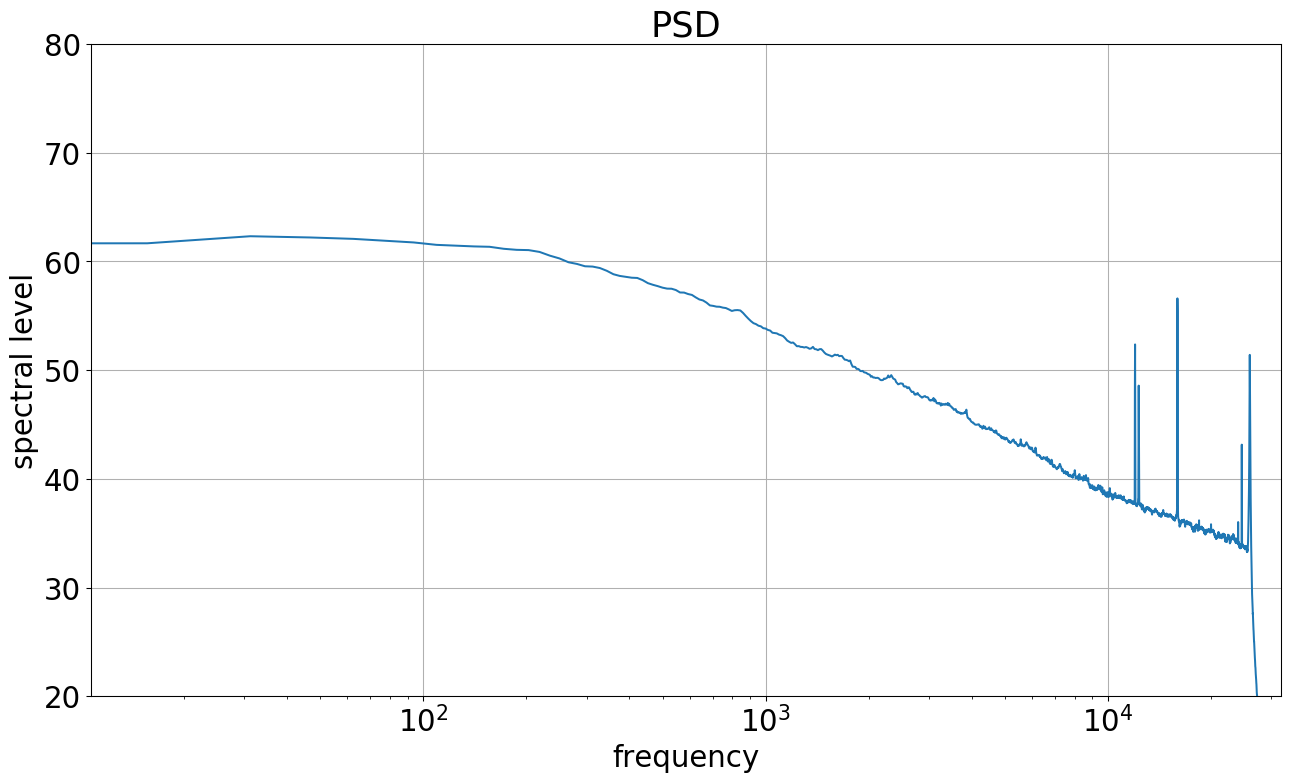

C:\Users\fschwock\Documents\Research\Studium_Master\Research\programming\ooi_lib\ooipy\ooipy\hydrophone\basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


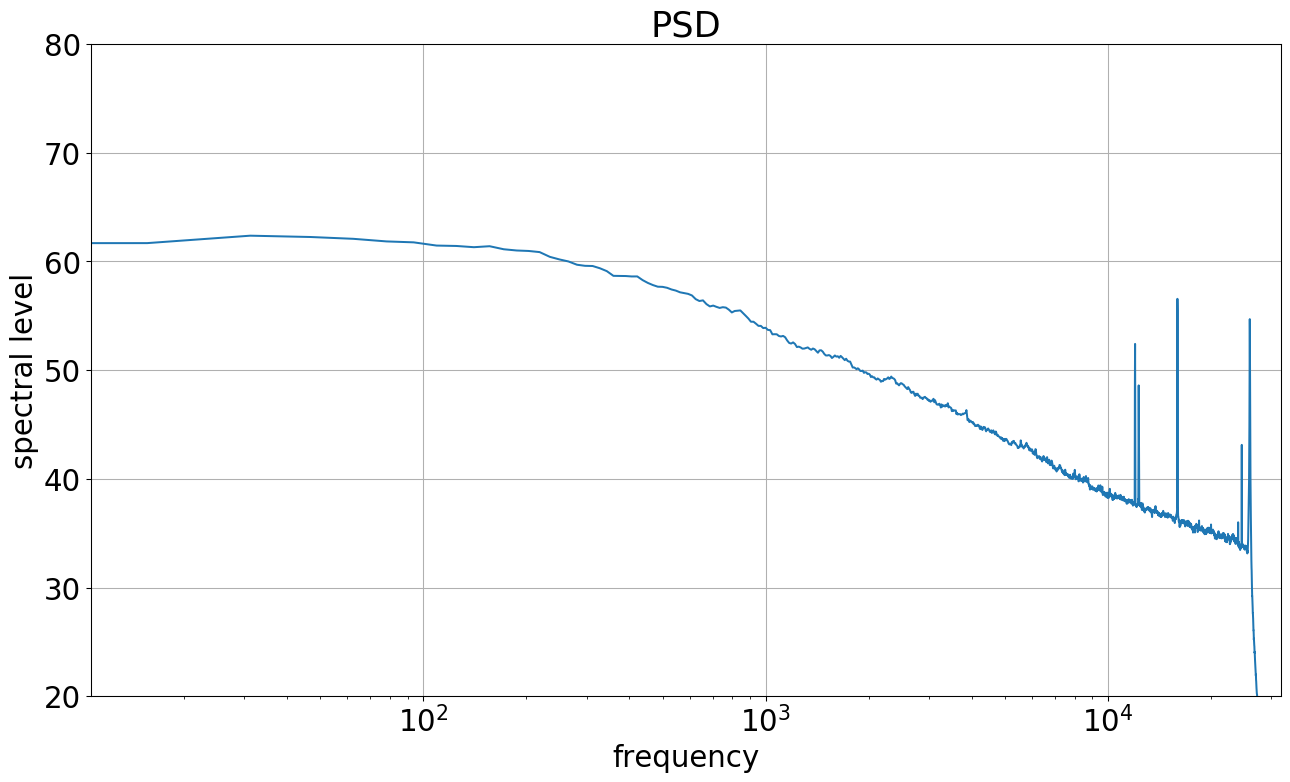

C:\Users\fschwock\Documents\Research\Studium_Master\Research\programming\ooi_lib\ooipy\ooipy\hydrophone\basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


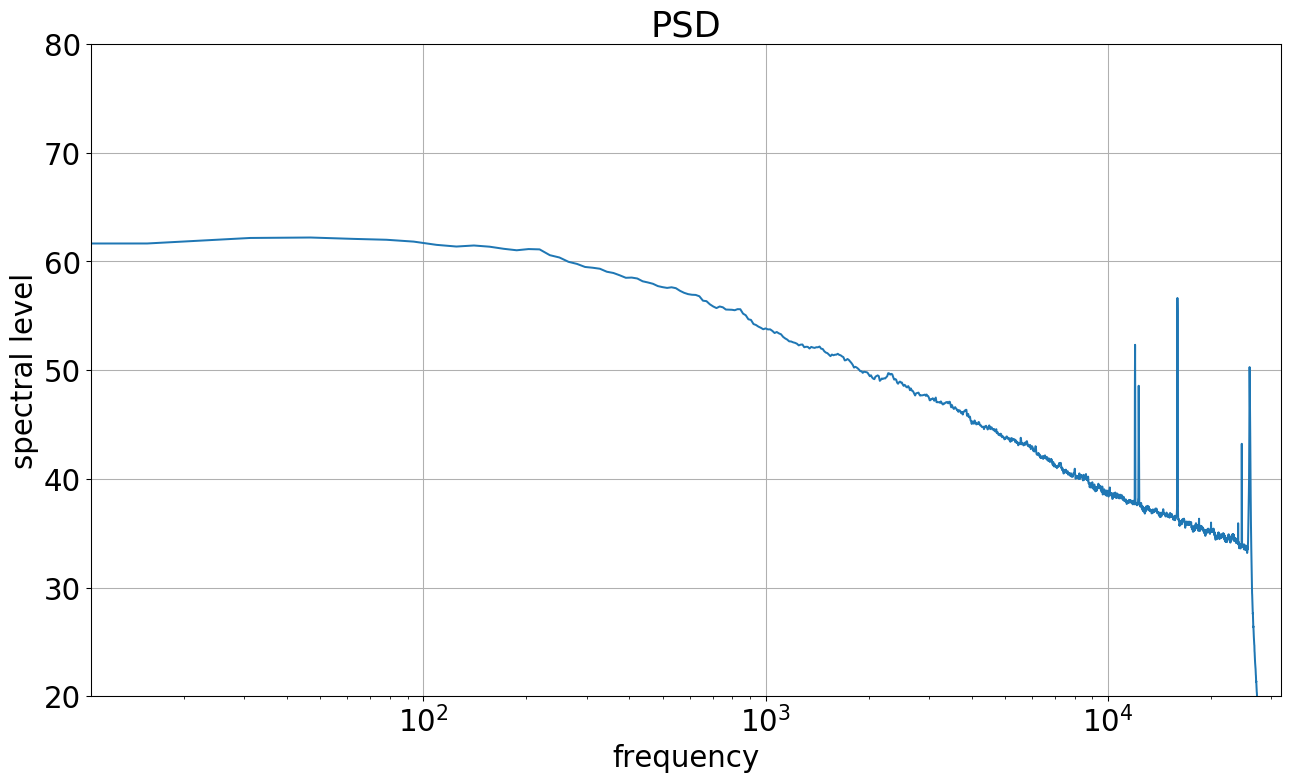

In [4]:
spec = data1.compute_spectrogram(avg_time=1.0)
spec.visualize()
#print(spec.time, spec.freq, spec.values)

spec_mp = data1.compute_spectrogram_mp(n_process = 3, avg_time=1.0)
#print(spec_mp.time, spec_mp.freq, spec_mp.values)
spec_mp.visualize()

psd = data1.compute_psd_welch()
#print(psd.freq, spec.values)
psd.visualize()

psd_mp = data1.compute_psd_welch_mp(split=150, n_process=2)
#print(psd_mp)
psd_mp[0].visualize()
psd_mp[1].visualize()